In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv("d:/Data Science/adsorption.csv")

In [3]:
df1= pd.read_csv('D:/Data Science/R1/Adsorption/Book2.csv')

In [4]:
df.head()

,ce,qe
0,570.0,17.500000
1,360.0,16.666667
2,225.0,14.861111
3,140.0,12.407407
4,90.0,9.104938


In [5]:
len(df.ce)

14

In [6]:
df1.columns = ['Ce', 'Qe', 'Langmuir', 'Freundlich', 'Redlich-Peterson', 'Toth', 'Langmuir-Freundlich'  ]

In [7]:
df2 = df1.dropna()
df2.head()

,Ce,Qe,Langmuir,Freundlich,Redlich-Peterson,Toth,Langmuir-Freundlich
6,570.0,17.500000,18.648740,20.198065,22.835482,21.704935,20.027396
7,360.0,16.666667,16.427007,15.799296,16.666666,16.666667,17.159811
8,225.0,14.861111,13.757718,12.289521,12.069684,12.642585,13.635189
9,140.0,12.407407,10.892152,9.536702,8.707423,9.505034,9.958389
10,90.0,9.104938,8.338133,7.530690,6.419438,7.246835,6.922287


ML regressors fitting

In [10]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(500)

In [11]:
X = df2.Ce
Y = df2.Qe

In [12]:
reg.fit(X[:,None],Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [13]:
ycalc = reg.predict(X[:,None])

In [8]:
def Langmuir(qm,kl,ce):
    
    L = qm*kl*ce/(1+kl*ce)
    return L

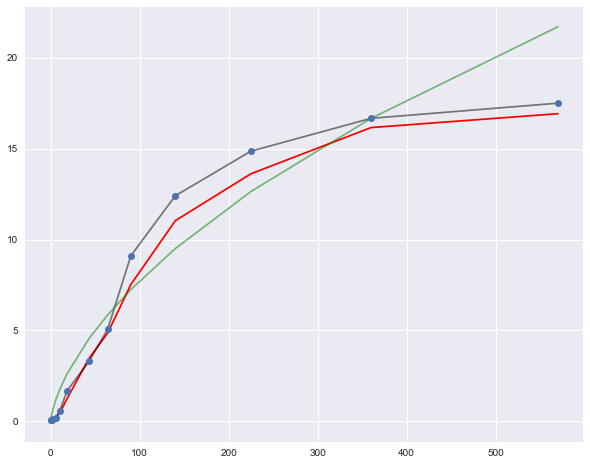

In [11]:
Langmuir(25, 0.005, df.ce[1])

16.071428571428573

In [58]:
qc

[24.912587412587413,
 24.861878453038674,
 24.779735682819382,
 24.64788732394366,
 24.456521739130434,
 24.242424242424242,
 23.88888888888889,
 22.536945812807883,
 20.901639344262293,
 18.243243243243242,
 14.247311827956988,
 9.375,
 4.838709677419355,
 1.5258215962441315]

In [12]:
def SAE(qe, qc):
    sae = (qe - qc)^2
    return sae

In [72]:
(np.square(np.matrix(df.qe) - np.matrix(qc))).sum()

2881.751826861208

In [46]:
import operator
k = map(operator.sub, [2,5,3], [3,5, 5]) # df.qe.tolist(), df.qe.tolist())

In [148]:
abs(1- np.matrix(qc)/np.matrix(df.qe)).sum()

397.86765487555658

In [89]:
def Normalize(x, mu, st_dev):
    
    norm = abs(x - mu)/st_dev
    
    return norm

In [161]:
#Check how Langmuir function works and errors formula
qm = 24.27
kl = 0.0058
qc = df.apply(lambda r: Langmuir(qm, kl, r.ce), axis = 1).tolist()
err_sae = abs((np.matrix(df.qe) - np.matrix(qc))).sum()
err_are = (100/len(df.qe)*abs((np.matrix(df.qe) - np.matrix(qc))/np.matrix(df.qe))).sum()
err_sse = np.square((np.matrix(df.qe) - np.matrix(qc))).sum()

# Non-linear fitting of Adsorption data by minimization of the errors

In [55]:
qm = np.linspace(5, 18, 100).tolist()
kl = np.linspace(0,0.1, 100).tolist()

In [56]:
import time

In [57]:
p = 2
start_time = time.time()
ind_coef = []
coef_k = []
coef_q = []

err_sae = []
err_are = []
err_sse = []
err_hybrid = []
err_mpsd = []
#err = [err_sae, err_are, err_sse, err_hybrid, err_mpsd]
err = [err_sae, err_are, err_sse]
for q in qm:
    for k in kl:
        qc = df.apply(lambda r: Langmuir(q, k, r.ce), axis = 1).tolist()
        #err_sae.append(abs((np.matrix(df.qe) - np.matrix(qc))).sum())
        err_are.append(100/len(df.qe)*abs((np.matrix(df.qe) - np.matrix(qc))/np.matrix(df.qe)).sum())
        #err_sse.append(np.square(np.matrix(df.qe) - np.matrix(qc)).sum())
        #err_hybrid.append(100/(len(df.qe) - p)*(np.square(np.matrix(df.qe) - np.matrix(qc))/np.matrix(df.qe)).sum())
        #err_mpsd.append(np.sqrt(10000/(len(df.qe) - p)*(np.square((np.matrix(df.qe) - np.matrix(qc))/np.matrix(df.qe)).sum())))
        ind_coef.append([q,k])
        coef_k.append(k)
        coef_q.append(q)
print("--- %s seconds ---" % (time.time() - start_time))

--- 8.088462591171265 seconds ---


In [58]:
ind_coef[np.argmin(err_are)], min(err_are)

([18.0, 0.00404040404040404], 41.60496086355026)

In [24]:
index_min = []
errors = []

for i in err:
    index_min.append(np.argmin(i))
    errors.append(err_are[np.argmin(i)])
   # errors.append([err_sae[np.argmin(i)], err_are[np.argmin(i)], err_sse[np.argmin(i)]])
    #errors.append([err_sae[np.argmin(i)], err_are[np.argmin(i)], err_sse[np.argmin(i)], err_hybrid[np.argmin(i)], err_mpsd[np.argmin(i)]])

ValueError: attempt to get argmin of an empty sequence

In [225]:
index_min

[4, 1, 4]

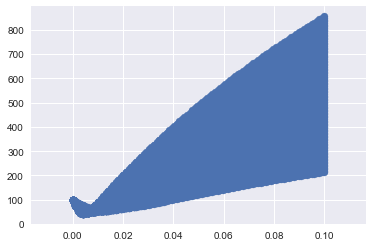

In [59]:
plt.scatter(x = coef_k, y = err_are)

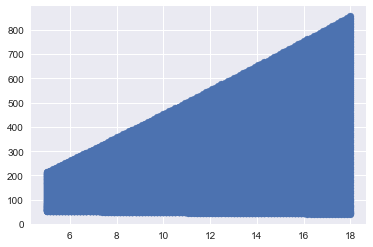

In [60]:
plt.scatter(x = coef_q, y = err_are)

In [72]:
(69 - (89+72+94+69)/4)/np.std([89,72,94,69])

-1.1214463524383946

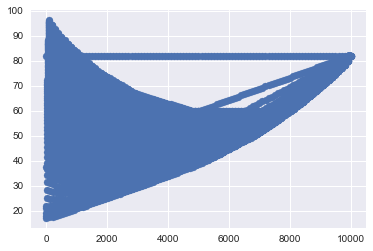

In [222]:
plt.scatter(x = list(range(len(err_are))), y = err_sae)

In [168]:
errors

[[17.087250307522893, 114.20777773673281, 32.934334251757164],
 [37.599522674826524, 43.74775675897944, 231.17757482989575],
 [17.087250307522893, 114.20777773673281, 32.934334251757164]]

In [223]:
#errors_norm = []
sum_errors_norm = []
for lists in errors:
    errors_norm = []
    mu1 = np.mean(lists)
    st_dev1 = np.std(lists)
    for x in lists:
        errors_norm.append(Normalize(x, mu1, st_dev1))
    sum_errors_norm.append(sum(errors_norm))
ind_min_sumer = np.argmin(sum_errors_norm)
err_names = ['SAE', 'ARE', 'SSE', 'HYBRID', 'MPSD']
#err_names[ind_min_sumer]
errors[ind_min_sumer]

[17.087250307522893, 114.20777773673281, 32.934334251757164]

In [224]:
ind_coef[index_min[ind_min_sumer]]

[18.0, 0.012121212121212121]

In [165]:
errors.append([err_sae[k], err_are[k], err_sse[k], err_hybrid[k], err_mpsd[k]])

(10.206360745191732,
 65.138226923018891,
 11.590001342215716,
 108.31409273525658,
 40.197272427342526)

In [141]:
Q_opt = ind_coef[index_min][0]
k_opt = ind_coef[index_min][1]
Y_fit = df1.apply(lambda r: Langmuir(Q_opt, k_opt, r[0]), axis = 1)

In [167]:
abs(-2)

2

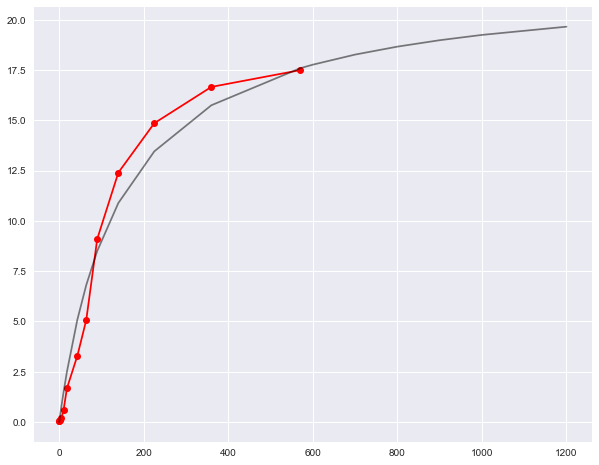

In [143]:
#Plotting the data
X = df.ce
Y = df.qe
plt.figure(figsize = (10,8))
plt.plot(X, Y, 'ro')
plt.plot(X, Y, '-r')
plt.plot(df1['Unnamed: 0'], Y_fit, '-k', alpha =0.5 )
#plt.plot(X, df2.Toth , '-g', alpha =0.5 )

In [118]:
len(Y_fit)

33

In [71]:
df3 = pd.read_csv('D:/Data Science/R1/Adsorption/PB.csv')

In [72]:
df3.head()

,Ce,Qe
0,1305.0,33.500000
1,792.4,30.093333
2,452.0,27.688889
3,264.3,22.162593
4,231.3,20.070000


In [74]:
X = df3.Ce
Y = df3.Qe
reg.fit(X[:,None],Y)
ycalc = reg.predict(X[:,None])

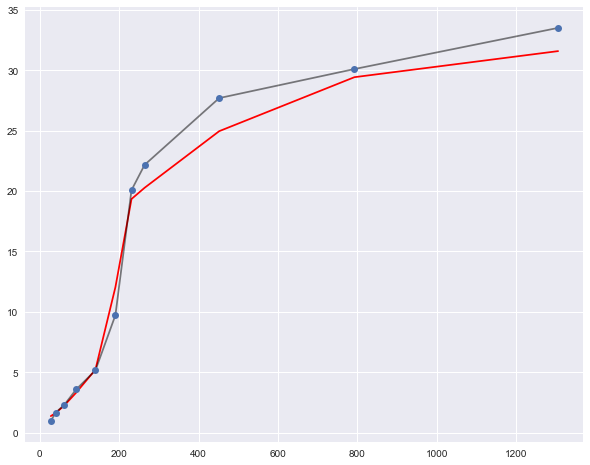

In [75]:
plt.figure(figsize = (10,8))
plt.errorbar(X,Y,0.1, fmt='o')
plt.plot(X, ycalc, '-r')
plt.plot (X, Y, '-k', alpha =0.5 )